In [203]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [204]:
import os
path = "/content/gdrive/My Drive/Colab Notebooks/CMPT733/Project"
os.chdir(path)
os.listdir(path)

['listings.csv', 'tmp.csv', 'Part2.ipynb', 'calendar.csv', 'reviews.csv']

In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go

In [206]:
df_listings = pd.read_csv("listings.csv")
df_calendar = pd.read_csv('calendar.csv')
df_reviews = pd.read_csv('reviews.csv')
df_calendar.head(3)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,1419,2022-12-07,f,$469.00,$469.00,28.0,730.0
1,1419,2022-12-08,f,$469.00,$469.00,28.0,730.0
2,1419,2022-12-09,f,$469.00,$469.00,28.0,730.0


In [207]:
len(df_listings)

16761

In [208]:
df_listings.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [209]:
df_listings.isnull().sum()

id                                    0
name                                  2
host_id                               0
host_name                             2
neighbourhood_group               16761
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        4157
reviews_per_month                  4157
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                            9675
dtype: int64

## Add neighbourhoods of Toronto
### East York, Etobicoke, North York, Scarborough, Toronto and York

In [210]:
def label_neighbourhood(value):
    if value in ["Broadview North", "Crescent Town", "Danforth East York", "Leaside-Bennington", "O'Connor-Parkview", "Old East York",\
                 "Thorncliffe Park", "Woodbine-Lumsden", "Taylor-Massey"]:
        return "East York"
    if value in ["Little Portugal", "Lawrence Park South", "Lawrence Park North", "Annex", "Bay Street Corridor", "Blake-Jones", "Cabbagetown-South St.James Town", \
                 "Casa Loma", "Church-Yonge Corridor", "Corso Italia-Davenport", "Danforth", "Dovercourt-Wallace Emerson-Junction", "Dufferin Grove", \
                 "East End-Danforth", "Forest Hill North", "Forest Hill South", "Greenwood-Coxwell", "High Park North", "High Park-Swansea", \
                 "Junction Area", "Kensington-Chinatown", "Moss Park", "Mount Pleasant East", "Mount Pleasant West", "Niagara", "North Riverdale", \
                 "North St.James Town", "Palmerston-Little Italy", "Playter Estates-Danforth", "Regent Park", "Roncesvalles", "Rosedale-Moore Park", \
                 "Runnymede-Bloor West Village", "South Riverdale", "South Parkdale", "The Beaches", "Trinity-Bellwoods", "University", \
                 "Waterfront Communities-The Island", "Weston-Pellam Park", "Woodbine Corridor", "Wychwood", "Yonge-Eglinton", "Yonge-St.Clair"]:
        return "Old City of Toronto"
    if value in ["Alderwood", "Edenbridge-Humber Valley", "Elms-Old Rexdale", "Eringate-Centennial-West Deane", "Etobicoke West Mall", \
                 "Humber Heights-Westmount", "Islington-City Centre West", "Kingsview Village-The Westway", "Kingsway South", "Long Branch", \
                 "Markland Wood", "Mimico", "Mimico (includes Humber Bay Shores)", "Mount Olive-Silverstone-Jamestown", "New Toronto", "Princess-Rosethorn", "Rexdale-Kipling", \
                 "Stonegate-Queensway", "Thistletown-Beaumond Heights", "West Humber-Clairville", "Willowridge-Martingrove-Richview"]:
        return "Etobicoke"
    if value in ["Banbury-Don Mills", "Bathurst Manor", "Bayview Village", "Bayview Woods-Steeles", "Bedford Park-Nortown", "Black Creek", \
                 "Bridle Path-Sunnybrook-York Mills", "Brookhaven-Amesbury", "Clanton Park", "Don Valley Village", "Downsview-Roding-CFB", \
                 "Englemount-Lawrence", "Flemingdon Park", "Glenfield-Jane Heights", "Henry Farm", "Hillcrest Village", "Humber Summit", \
                 "Humbermede", "Lansing-Westgate", "Maple Leaf", "Newtonbrook East", "Newtonbrook West", "Parkwoods-Donalda", "Pelmo Park-Humberlea", \
                 "Pleasant View", "Rustic", "St.Andrew-Windfields", "Victoria Village", "Westminster-Branson", "Willowdale East", "Willowdale West",\
                 "York University Heights", "Yorkdale-Glen Park"]:
        return "North York"
    if value in ["Agincourt North", "Agincourt South-Malvern West", "Bendale", "Birchcliffe-Cliffside", "Centennial Scarborough", "Clairlea-Birchmount", \
                 "Cliffcrest", "Dorset Park", "Eglinton East", "Guildwood", "Highland Creek", "Ionview", "Kennedy Park", "L'Amoreaux", "Malvern", \
                 "Milliken", "Morningside", "Oakridge", "Rouge", "Scarborough Village", "Steeles", "Tam O'Shanter-Sullivan", "West Hill", \
                 "Wexford/Maryvale", "Woburn"]:
        return "Scarborough"
    if value in ["Beechborough-Greenbrook", "Briar Hill-Belgravia", "Caledonia-Fairbank", "Humewood-Cedarvale", "Keelesdale-Eglinton West", \
                 "Lambton Baby Point", "Mount Dennis", "Oakwood Village", "Rockcliffe-Smythe", "Weston"]:
        return "York"
    

df_listings["neighbourhood_group"] = df_listings['neighbourhood'].map(label_neighbourhood)
df_listings.isnull().sum()

id                                   0
name                                 2
host_id                              0
host_name                            2
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       4157
reviews_per_month                 4157
calculated_host_listings_count       0
availability_365                     0
number_of_reviews_ltm                0
license                           9675
dtype: int64

In [211]:
data = df_listings.copy()

In [212]:
data.neighbourhood_group.unique()

array(['Old City of Toronto', 'East York', 'Scarborough', 'North York',
       'Etobicoke', 'York'], dtype=object)

In [213]:
sub_1=data.loc[data['neighbourhood_group'] == 'Old City of Toronto']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=data.loc[data['neighbourhood_group'] == 'East York']
price_sub2=sub_2[['price']]
#Queens
sub_3=data.loc[data['neighbourhood_group'] == 'Scarborough']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=data.loc[data['neighbourhood_group'] == 'North York']
price_sub4=sub_4[['price']]
#Bronx
sub_5=data.loc[data['neighbourhood_group'] == 'Etobicoke']
price_sub5=sub_5[['price']]
sub_6=data.loc[data['neighbourhood_group'] == 'York']
price_sub6=sub_6[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5, price_sub6]

In [214]:
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['Old City of Toronto', 'East York', 'Scarborough', 'North York', 'Etobicoke', 'York']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Old City of Toronto,East York,Scarborough,North York,Etobicoke,price
Stats,,,,,,
min,14.0,14.00,14.0,13.0,0.0,17.0
25%,95.0,65.00,50.0,56.0,64.0,58.0
50%,141.0,102.00,74.0,86.0,99.0,90.0
75%,224.0,167.25,120.0,149.0,159.0,139.5
max,110114.0,2000.00,98108.0,13000.0,2500.0,2000.0


In [215]:
sub_6=data[data.price < 600]
fig = go.Figure()
days = ['Old City of Toronto', 'East York', 'Scarborough', 'North York', 'Etobicoke', 'York']
for day in days:
    fig.add_trace(go.Violin(x=sub_6['neighbourhood_group'][sub_6['neighbourhood_group'] == day],
                            y=sub_6['price'][sub_6['neighbourhood_group'] == day],
                            name=day,
                            box_visible=True,
                            meanline_visible=True))
fig.update_layout(
    title_text="Density and distribution of prices for each neighberhood_group")
fig.show()

In [216]:
import plotly.express as px

fig = px.scatter_mapbox(sub_6, lat='latitude', lon='longitude', color='price',
                        color_continuous_scale='jet', size='availability_365',
                        hover_name='name', size_max=6, zoom=10, height=600)

fig.update_layout(mapbox_style='open-street-map')
fig.show()


In [217]:
# def handle_price(df):
#     df['price']=df['price'].map(lambda v: float(v[1:].replace(",","")) if type(v) != float else v)
#     return df

In [218]:
# handle_price(df_calendar)

In [219]:
df_calendar['available'].replace({'t':1,'f':0},inplace=True)
df_calendar['month']=pd.DatetimeIndex(df_calendar['date']).month
df_calendar['year']=pd.DatetimeIndex(df_calendar['date']).year
df_calendar['year'] = df_calendar['year'] - 1
df_calendar['Month_Year'] = pd.to_datetime(df_calendar['date'])
df_calendar['Month_Year'] = df_calendar['Month_Year'] - pd.DateOffset(years=1)
df_calendar['Month_Year'] = df_calendar['Month_Year'].dt.to_period('M')

df_calendar.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,month,year,Month_Year
0,1419,2022-12-07,0,$469.00,$469.00,28.0,730.0,12,2021,2021-12
1,1419,2022-12-08,0,$469.00,$469.00,28.0,730.0,12,2021,2021-12
2,1419,2022-12-09,0,$469.00,$469.00,28.0,730.0,12,2021,2021-12
3,1419,2022-12-10,0,$469.00,$469.00,28.0,730.0,12,2021,2021-12
4,1419,2022-12-11,0,$469.00,$469.00,28.0,730.0,12,2021,2021-12


## Availibility during the last 12 months

<AxesSubplot:title={'center':'Avg Availability per Month'}, xlabel='Month_Year', ylabel='avg_availability'>

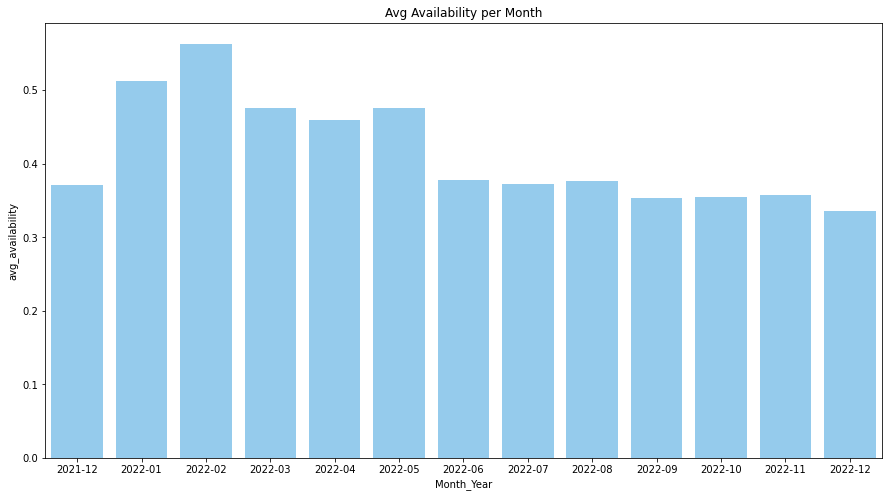

In [220]:
availibility=df_calendar.groupby('Month_Year')['available'].mean().reset_index().rename(columns={'available':'avg_availability'})

x=availibility['Month_Year']
y=availibility['avg_availability']

plt.figure(figsize=(15,8))
plt.title("Avg Availability per Month")

sns.barplot(data=availibility,x='Month_Year',y='avg_availability',color= 'LightSkyBlue',palette=None)
# availibility.sort_values(by='avg_availability',ascending=False)


In [221]:
avail_listing_cond = df_calendar['available'] == 1  # select all available listing
avail_listing_df = df_calendar.loc[avail_listing_cond, :]

list_mon_grouped = avail_listing_df.groupby('month').count()
# ax2_2 = sns.barplot(x=list_mon_grouped.index.values, y=list_mon_grouped['listing_id'].values)
# ax2_2.set_ylim(50000, 300000)
# ax2_2.set_ylabel("Number of listing")
# ax2_2.set_xlabel("Month")
# ax2_2.set_title("Distribution of listing from January to December")

import plotly.graph_objs as go

trace = go.Bar(
    x=list_mon_grouped.index.values,
    y=list_mon_grouped['listing_id'].values,
    marker=dict(color='PowderBlue')
)
layout = go.Layout(
    xaxis=dict(title='Month'),
    yaxis=dict(title='Number of listing', range=[50000, 300000]),
    title='Distribution of listing from January to December'
)

fig = go.Figure(data=[trace], layout=layout)
fig.show()


In [222]:
fig = px.histogram(df_listings, x='neighbourhood_group', color='room_type')
fig.update_layout(xaxis_tickangle=-90,
                  xaxis_title='Neighbourhood_group', yaxis_title='# of listings')
fig.show()

In [223]:
# new = df_reviews.groupby(['Month']).count()[['reviewer_id']].sort_values(by = 'reviewer_id', ascending = False)
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437485 entries, 0 to 437484
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     437485 non-null  int64 
 1   id             437485 non-null  int64 
 2   date           437485 non-null  object
 3   reviewer_id    437485 non-null  int64 
 4   reviewer_name  437485 non-null  object
 5   comments       437439 non-null  object
dtypes: int64(3), object(3)
memory usage: 20.0+ MB


## Top neighbour

In [224]:
Top_neighbour_per_price=df_listings.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).reset_index().rename(columns={'price':'avg_price'})

x=Top_neighbour_per_price['neighbourhood'].head(5)
y=Top_neighbour_per_price['avg_price'].head(5)

# plt.figure(figsize=(15,8))
# plt.title("Top neighbourhood in terms of Price/night")
# sns.barplot(data=Top_neighbour_per_price,x=x,y=y,color='PowderBlue',palette=None)
# Top_neighbour_per_price.head(5)

fig = px.bar(x=x, y=y, title="Top neighbourhood in terms of Price/night")
fig.update_layout(xaxis_title='Neighbourhood_group', yaxis_title='Price')
fig.show()